In [223]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [315]:
claims = pd.read_csv("C:\\Users\\TSL\\Desktop\\AL\\assignments\\5th\\claims.csv")
demo = pd.read_csv("C:\\Users\\TSL\Desktop\\AL\\assignments\\5th\\cust_demographics.csv")

In [316]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [317]:
demo.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [318]:
claims.rename(columns={"customer_id":"CUST_ID"},inplace=True)

In [319]:
claims.head(2)

,claim_id,CUST_ID,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [320]:
comb = pd.merge(left=demo, right=claims,on='CUST_ID',how="outer")

In [321]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaN,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,14818669,NaN,NaN,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,85322831,NaN,NaN,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,73449366,NaN,NaN,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [322]:
#export data to review in excel format

In [323]:
comb.to_csv('combined.csv')

PermissionError: [Errno 13] Permission denied: 'combined.csv'

In [324]:
#checking Data Types

In [325]:
comb.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [326]:
#converting the format for dateofbirth and claim_date to datetime format

In [327]:
comb["DateOfBirth"] = pd.to_datetime(comb["DateOfBirth"], format="%d-%b-%y")

In [328]:
comb["claim_date"] = pd.to_datetime(comb.claim_date, format = "%m/%d/%Y")

In [329]:
comb['Contact']=comb.Contact.str.replace("-", "")

In [330]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,$3059,4.0,Yes
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,$1520,2.0,No
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,$23575,2.0,Yes
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,$25120,1.0,No


In [331]:
comb["Contact"] = pd.to_numeric(comb.Contact)

In [332]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,$3059,4.0,Yes
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,$1520,2.0,No
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,$23575,2.0,Yes
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,$25120,1.0,No


In [333]:
#Use the appropriate modules/attributes to remove the $ sign

In [334]:
comb['claim_amount']=comb.claim_amount.str.replace("$", "")

<ipython-input-334-a64a669c8997>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  comb['claim_amount']=comb.claim_amount.str.replace("$", "")


In [335]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059,4.0,Yes
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520,2.0,No
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575,2.0,Yes
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120,1.0,No


# 4.Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [336]:
comb['Alert_flag']=np.where((('incident_cause'== "injury") & ('police_report' == "yes")), 'OK','Alert')

In [337]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No,Alert
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No,Alert
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Alert
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950,6.0,No,Alert
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680,1.0,No,Alert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059,4.0,Yes,Alert
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520,2.0,No,Alert
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575,2.0,Yes,Alert
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120,1.0,No,Alert


# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any #duplicated records in the data based on the customer ID column

In [338]:
comb_unique=comb.drop_duplicates(subset=['CUST_ID'], keep='first')

In [339]:
comb.drop_duplicates?

In [340]:
comb_unique

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No,Alert
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No,Alert
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Alert
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680,1.0,No,Alert
6,19269962,Male,1977-05-13,NV,9.568719e+09,Gold,22890252.0,Crime,2018-01-13,Auto,No,Material only,2680,1.0,No,Alert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059,4.0,Yes,Alert
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520,2.0,No,Alert
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575,2.0,Yes,Alert
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120,1.0,No,Alert


In [341]:
comb["claim_amount"] = pd.to_numeric(comb.claim_amount)

In [342]:
comb.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
Alert_flag                     object
dtype: object

# 6. #Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [343]:
comb.isnull().sum()

CUST_ID                 0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
Alert_flag              0
dtype: int64

In [344]:
comb['claim_amount'].fillna(comb['claim_amount'].mean(),inplace=True)

In [345]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Alert
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Alert
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Alert
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Alert
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Alert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,Alert
1103,14818669,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,Alert
1104,85322831,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,Alert
1105,73449366,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,Alert


In [360]:
comb.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth            15
State                   0
Contact                15
Segment                 0
claim_id                7
incident_cause          0
claim_date              7
claim_area              0
police_report           7
claim_type              0
claim_amount            0
total_policy_claims    17
fraudulent              0
Alert_flag              0
dtype: int64

In [361]:
categorical = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","Alert_flag"]
for col in categorical:
    comb[col] = comb[col].fillna(comb[col].mode()[0])

In [362]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Alert
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Alert
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Alert
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Alert
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Alert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,35951012,Male,NaT,NY,NaN,Gold,97727122.0,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,Alert
1103,14818669,Male,NaT,NY,NaN,Gold,10247193.0,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,Alert
1104,85322831,Male,NaT,NY,NaN,Gold,79807493.0,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,Alert
1105,73449366,Male,NaT,NY,NaN,Gold,69299345.0,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,Alert


In [526]:
comb.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True )

In [527]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag,Age,Age_grp
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Alert,38.87,Adult
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Alert,48.72,Adult
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Alert,33.90,Adult
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Alert,34.06,Adult
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Alert,32.13,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Alert,37.48,Adult
1088,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Alert,20.84,Youth
1089,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Alert,27.09,Youth
1090,11256802,Female,2064-10-22,LA,4.693456e+09,Silver,12376894.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Alert,-47.51,Children


In [528]:
#Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria

In [529]:
from datetime import date
today = date.today()

In [530]:
today

datetime.date(2021, 12, 18)

In [531]:
from numpy import where as IF

In [532]:
comb["Age"] = round((comb.claim_date - comb.DateOfBirth).apply(lambda x: x.days)/365.25, 2)

In [533]:
comb["Age_grp"]=IF(comb.Age < 18, "Children",
                        IF(comb.Age < 30, "Youth",
                         IF(comb.Age < 60, "Adult",
                          IF(comb.Age < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )

In [534]:
comb["Age_grp"] = comb["Age_grp"].fillna(comb["Age_grp"].mode()[0])
comb.groupby(by = "Age_grp").count()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag,Age
Age_grp,,,,,,,,,,,,,,,,,
Adult,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
Children,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
Youth,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325


In [535]:
#8.What is the average amount claimed by the customers from various segments

In [536]:
comb["claim_amount"] = pd.to_numeric(comb.claim_amount)

In [537]:
comb.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12707.126701
Platinum,12399.703824
Silver,12235.485197


In [538]:
#9.What is the total claim amount based on incident cause for all the claims
#that have been done at least 20 days prior to 1st of October, 2018

In [539]:
comb.loc[comb.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum()

incident_cause
Crime                 7.243206e+05
Driver error          3.317556e+06
Natural causes        1.295311e+06
Other causes          3.723369e+06
Other driver error    3.202666e+06
Name: claim_amount, dtype: float64

In [540]:
#10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [541]:
comb.loc[(comb.incident_cause.str.lower().str.contains("driver") 
             & ((comb.State == "TX") | (comb.State == "DE") | (comb.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    11
DE    15
TX    10
Name: State, dtype: int64

In [542]:
#11Draw a pie chart between the aggregated value of claim amount basedon gender and segment. Represent the claim amount as a percentage on the pie chart

In [543]:
f1 = comb.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()

In [544]:
res = f1.pivot(index = "Segment", columns = "gender", values = "claim_amount")

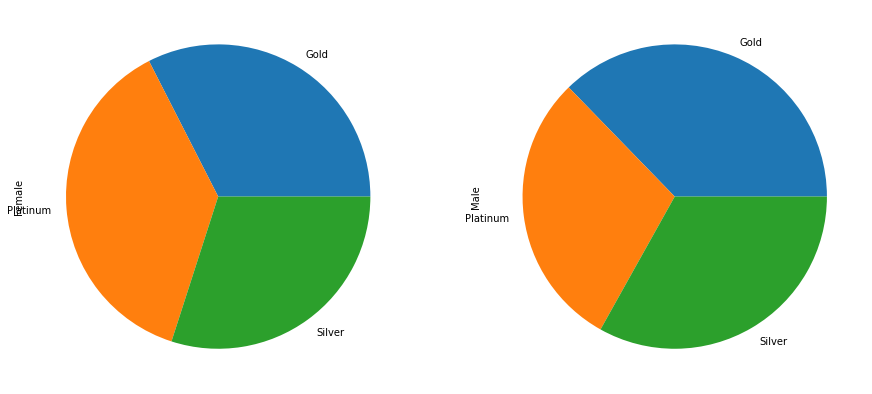

In [545]:
res.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

In [546]:
#12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [547]:
f2 = comb.loc[(comb.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
f2

,gender,CountOf_gender
0,Female,217
1,Male,282


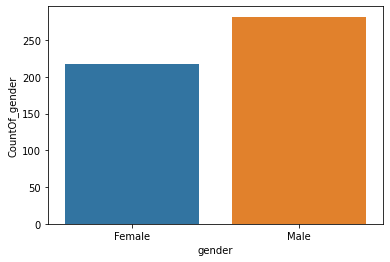

In [548]:
sns.barplot(x = "gender", y = "CountOf_gender", data = f2 )
plt.show()

In [549]:
#13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [550]:
a=comb.groupby(by = "Age_grp")[["fraudulent"]].count()

In [551]:
a

,fraudulent
Age_grp,
Adult,500
Children,250
Youth,325


<AxesSubplot:xlabel='Age_grp'>

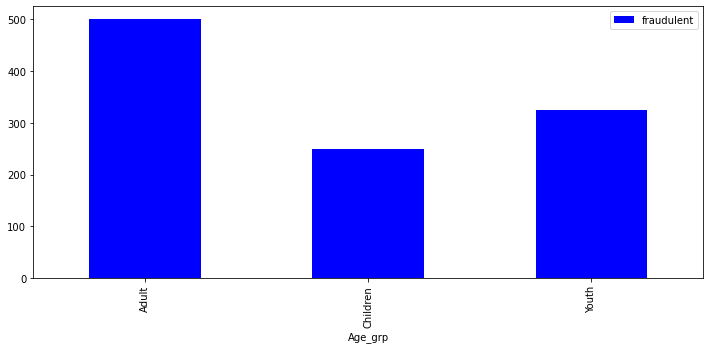

In [552]:
a.plot(kind='bar', stacked=False, figsize=(12, 5),color='blue')

In [553]:
comb

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag,Age,Age_grp
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Alert,38.87,Adult
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Alert,48.72,Adult
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Alert,33.90,Adult
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Alert,34.06,Adult
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Alert,32.13,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Alert,37.48,Adult
1088,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Alert,20.84,Youth
1089,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Alert,27.09,Youth
1090,11256802,Female,2064-10-22,LA,4.693456e+09,Silver,12376894.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Alert,-47.51,Children


# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

# 16. Is there any similarity in the amount claimed by males and females?

2 sample t-test

H0 : Mean amount claimed by Males = Mean amount claimed by Females
Ha : Mean amount claimed by Males <> Mean amount claimed by Females

In [554]:
import scipy.stats as stats

In [555]:
male_amount=comb[comb['gender']=='Male'].claim_amount
female_amount=comb[comb['gender']=='Female'].claim_amount
male_mean=comb[comb['gender']=='Male'].claim_amount.mean()
female_mean=comb[comb['gender']=='Female'].claim_amount.mean()

In [556]:
male_amount

6        2680.0
7        2240.0
8       38306.5
9       36810.0
10       1730.0
         ...   
1084     2290.0
1085     2320.0
1086     2173.5
1089    33080.0
1091     1490.0
Name: claim_amount, Length: 552, dtype: float64

In [557]:
male_mean

12828.787145557659

In [558]:
female_mean

12055.087004553812

In [559]:
sd_male=comb[comb['gender']=='Male'].claim_amount.var()
sd_female=comb[comb['gender']=='Female'].claim_amount.var()

sd_male==sd_female

False

In [560]:
stats.ttest_ind?

In [561]:
tt = stats.ttest_ind(a=male_amount,b=female_amount, equal_var=False)

In [562]:
tt

Ttest_indResult(statistic=0.9502607234925167, pvalue=0.34219388699740294)

as p value is greater than 5% with 95 % confidence interval, we can accept null hypothesis.

# 17. Is there any relationship between age category and segment?

In [563]:
cat_seg = pd.crosstab(comb.Age_grp,comb.Segment,margins=False)

In [564]:
cat_seg

Segment,Gold,Platinum,Silver
Age_grp,,,
Adult,181,158,161
Children,84,86,80
Youth,104,116,105


In [565]:
chi_test = stats.chi2_contingency(observed=cat_seg)

In [566]:
chi_test

(2.132262806354166,
 0.7114476566210943,
 4,
 array([[171.62790698, 167.44186047, 160.93023256],
        [ 85.81395349,  83.72093023,  80.46511628],
        [111.55813953, 108.8372093 , 104.60465116]]))

p value is less than 5% therefore there is relation between age group and segment.

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

In [567]:
#mean of sample=10000
stats.ttest_1samp?

we can perform 1 sample t=test here

In [569]:
b=stats.ttest_1samp(a = comb.claim_amount,popmean=10000)

In [570]:
b

Ttest_1sampResult(statistic=6.021442896486684, pvalue=2.370424127370524e-09)

p value is less than 5% therefore we need the reject the null hypothesis

# 19. Is there any difference between age groups and insurance claims?

In [571]:
# As there are 3 categories so we will take 2 age groups and can perform 2 sample t-test

In [572]:
adult = comb[comb['Age_grp'] == 'Adult'].total_policy_claims
youth = comb[comb['Age_grp'] == 'Youth'].total_policy_claims
#print(adult)

In [573]:
adult_mean=np.mean(adult)
Youth_mean=np.mean(youth)
print(adult_mean)
print(Youth_mean)
adult_mean-Youth_mean

1.594
1.633846153846154


-0.039846153846153864

In [574]:
adult_var=np.var(adult)
Youth_var=np.var(youth)
print(adult_var)
print(Youth_var)
adult_var==Youth_var

1.197164000000007
1.610546745562135


False

In [575]:
q19 = stats.ttest_ind(a=adult,b=youth,equal_var=False)
q19

Ttest_indResult(statistic=-0.4641455064024439, pvalue=0.6427067795569088)

pvalue is greater than 0.05 so we select alternate hypothesis with 95% CI

# 20. Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
# iam using co-relation test here

In [579]:
policy_claims = comb.total_policy_claims
claim_amount = comb.claim_amount

In [581]:
ct = stats.pearsonr(policy_claims,claim_amount)
ct

(-0.017539099838766354, 0.5656748278400697)

since the co-relation value is negative so they are inversely proportional